<a href="https://colab.research.google.com/github/Ziqi-Li/GIS5122/blob/main/assignments/GIS5122_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5
**Due date/time:** Apr 9th Tue 23:59pm

**Instruction**: Make a copy of this notebook and read through the questions and instructions. Write down code/text to perform the analysis.

**Submission**: After you finish working on this notebook, click File->Download->Download .ipynb

Please submit a notebook named A5_your_name.ipynb on Canvas.

## Detailed instructions:

In this assignment, you will practice building Multi-level Models (MLM).

We will be re-using our data and model specifications from Assignment 3 and 4. For the same set of dependent variable (y) and independent variables (X) you will build 3 models.


**Model 1 (30%):** Fit an MLM with varying intercept only (no Xs) as follows

`model1 = Lmer('y ~ 1 + (1|state)', data=your_data)`

Describe your model output and calculate the Variance Partition Coefficient (VPC), explain your results.

**Model 2 (30%):** Fit an MLM with varying intercept and your independent variables as fixed effects as follows

`model2 = Lmer('y ~ 1 + x1 + x2 + ...xj + (1|state)', data=your_data)`

Map your state-level random effect for the intercept, and explain your MLM model output.

**Model 3 (30%):** Fit an MLM with varying intercept and both fixed and random effect for your independent variables (a varying intercept + slope model) as follows:

`model3 = Lmer('y ~ 1 + x1 + x2 + ...xj + (1 + x1 + x2 + ...xj|state)', data=your_data)`

Map all of your state-level random effects, and explain your MLM model output.

**Final comparison (10%):** compare AIC, conditional and marginal R2 in three models.

Note: replace x1, x2... in the model with the column name of your independent variable.


In [1]:
import os 
os.environ['R_HOME']= r"C:\Program Files\R\R-4.3.1"

In [2]:
from pymer4.models import Lmer

In [3]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

Code to read in data and merge them into one final `GeoDataFrame`.

In [4]:
health_url = "https://raw.github.com/Ziqi-Li/GIS5122/main/data/cdc_health_county.csv"
health = pd.read_csv(health_url)

In [5]:
socio_demo_url = "https://raw.github.com/Ziqi-Li/GIS5122/main/data/acs_2019.csv"
socio_demo = pd.read_csv(socio_demo_url)

In [6]:
counties_url = "https://raw.github.com/Ziqi-Li/gis5122/master/data/us_counties.geojson"
counties = gpd.read_file(counties_url)

In [7]:
socio_demo_health = pd.merge(socio_demo, health, left_on = "county_id", right_on = "LocationID")

In [8]:
gdf_socio_demo_health = pd.merge(counties, socio_demo_health, on = "county_id")

Your code will start here, and your analysis will be based on this GeoDataFrame `gdf_income_health`.

In [9]:
# Dependent variable
y_variable = gdf_socio_demo_health['OBESITY']


# Independent variables
variable_names = ['median_income', 'pct_black', 
                                    'pct_bach']


In [10]:
state = gdf_socio_demo_health.dissolve(by='state')

# Model 1

In [11]:
model_1 = Lmer('OBESITY ~ 1 + (1|state)', data=gdf_socio_demo_health)

model_1.fit()

C:\Users\jacob\anaconda3\Lib\site-packages\rpy2\robjects\pandas2ri.py:65: UserWarning: Error while trying to convert the column "geometry". Fall back to string conversion. The error is: 'GeometryDtype' object has no attribute 'isnative'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+(1|state)

Family: gaussian	 Inference: parametric

Number of observations: 3103	 Groups: {'state': 48.0}

Log-likelihood: -8194.815 	 AIC: 16395.629

Random effects:

                 Name     Var    Std
state     (Intercept)  12.854  3.585
Residual               10.828  3.291

No random effect correlations specified

Fixed effects:



C:\Users\jacob\anaconda3\Lib\site-packages\pymer4\models\Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),33.878,32.846,34.911,0.527,45.421,64.322,0.0,***


### Question:
Describe your model output and calculate the Variance Partition Coefficient (VPC), explain your results.

### Model Output Description

- There are 3103 observations in the dataset, grouped into 48 states

- The model has an AIC (Akaike Information Criterion): 16395.629, a measure of the relative quality of statistical models for a given set of data.

- The random effect for states has a variance (Var) of 12.854 and a standard deviation (Std) of 3.585. This variation quantifies how much the intercepts (base obesity rates) vary from one state to another.

- The residual variance (i.e., within-state variance) is 10.828 with a standard deviation of 3.291. This measures the variability in obesity rates within states that is not explained by state-level intercepts.



- The global average obesity rate (Intercept) is estimated at 33.878 with a standard error of 0.527. The 95% confidence interval ranges from 32.846 to 34.911, and the estimate is highly statistically significant (P-value < 0.001), as indicated by the stars (***).



- The Variance Partition Coefficient (VPC) = 12.854 /(12.854 + 10.828) = 0.543, or 54.3%. About 54.3% of the total variance in obesity rates is attributable to differences between states. This suggests that the state a person resides in has a significant impact on their obesity rate, supporting the inclusion of states as random effects in the model


# Model 2

In [12]:
warnings.filterwarnings('ignore')

model_2 = Lmer('OBESITY ~ 1 + pct_bach + pct_black + median_income + (1|state)', data=gdf_socio_demo_health)

model_2.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+pct_bach+pct_black+median_income+(1|state)

Family: gaussian	 Inference: parametric

Number of observations: 3103	 Groups: {'state': 48.0}

Log-likelihood: -6877.069 	 AIC: 13766.138

Random effects:

                 Name    Var    Std
state     (Intercept)  4.901  2.214
Residual               4.580  2.140

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),41.109,40.366,41.851,0.379,83.465,108.528,0.0,***
pct_bach,-0.185,-0.197,-0.173,0.006,3072.527,-30.140,0.0,***
pct_black,0.109,0.101,0.116,0.004,3098.399,27.268,0.0,***
median_income,-0.000,-0.000,-0.000,0.000,3080.600,-14.561,0.0,***


Text(0.5, 1.0, 'Varying intercept')

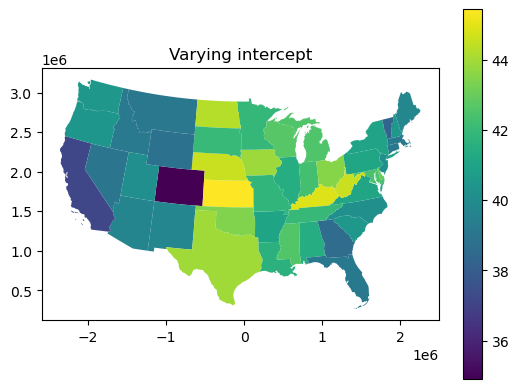

In [13]:
state.plot(model_2.ranef.iloc[:,0].values + model_2.coefs.Estimate[0],legend=True)
plt.title("Varying intercept")

- The model used 3,103 observations across 48 states to fit the model
- The model has an AIC (Akaike Information Criterion): 13766.138, a measure of the relative quality of statistical models for a given set of data.

#### Random Effects
- The variance of the random intercepts for states is 4.901, with a standard deviation of 2.214. This implies there's substantial variability in the baseline obesity rates across different states. The high variance for the intercepts suggests that states differ notably in their average obesity rates, even after accounting for the effects of the predictors included in the model. This variability might be due to other unmeasured state-specific factors.

- The residual within-state variance is  4.580, with a standard deviation of 2.140. This indicates the variation in obesity rates within states that is unexplained by the model's fixed and random effects.
- The Variance Partition Coefficient (VPC) = 4.901 /(4.901 + 4.580) = 0.516, or 51.6%. This VPC value indicates that about 51.7% of the total variability in obesity rates across the dataset is attributable to differences between states in their baseline obesity rates (intercepts). This substantial percentage underscores significant state-level differences, justifying the use of random intercepts to capture these variations in the model.

### Fixed Effects

- The estimated baseline obesity rate is 41.109 when all predictors are held at zero. 

- Percentage with a Bachelor's degree (pct_bach, -0.185) indicates that each percentage increase in bachelor's degree holders is associated with a 0.185 percentage point decrease in the obesity rate, significant at the 0.000 level. The negative coefficient indicates that higher education levels are associated with lower obesity rates. This might reflect socio-economic factors where higher education levels correlate with better health awareness and behaviors
- Percentage of Black population (pct_black, 0.109) suggests that each percentage point increase in the Black population is associated with a 0.109 percentage point increase in the obesity rate, also significant at the 0.000 level. The positive coefficient suggests a higher obesity rate with an increasing proportion of the Black population. This effect could reflect socio-economic and health disparity issues that disproportionately affect Black communities.
- Median Income (median_income, very small negative effect): Each unit increase in median income results in a tiny decrease in the obesity rate, significant at the 0.000 level.The very small negative effect of median income suggests that higher income slightly reduces obesity rates, possibly due to better access to healthier food options and health care.

# Model 3

In [14]:
warnings.filterwarnings('ignore')
model3 = Lmer('OBESITY ~ 1 + pct_bach + pct_black + median_income + (1 + pct_bach + pct_black + median_income|state)', data=gdf_socio_demo_health)

model3.fit()
model3.summary()

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+pct_bach+pct_black+median_income+(1+pct_bach+pct_black+median_income|state)

Family: gaussian	 Inference: parametric

Number of observations: 3103	 Groups: {'state': 48.0}

Log-likelihood: -6845.196 	 AIC: 13720.392

Random effects:

                   Name     Var    Std
state       (Intercept)  14.820  3.850
state          pct_bach   0.000  0.009
state         pct_black   0.002  0.042
state     median_income   0.000  0.000
Residual                  4.352  2.086

               IV1            IV2   Corr
state  (Intercept)       pct_bach  1.000
state  (Intercept)      pct_black -0.482
state  (Intercept)  median_income -0.820
state     pct_bach      pct_black -0.482
state     pct_bach  median_income -0.820
state    pct_black  median_income  0.198

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+pct_bach+pct_black+median_income+(1+pct_bach+pct_blac

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),41.179,39.960,42.398,0.622,29.239,66.210,0.0,***
pct_bach,-0.186,-0.199,-0.174,0.006,265.002,-29.132,0.0,***
pct_black,0.102,0.083,0.121,0.010,8.235,10.725,0.0,***
median_income,-0.000,-0.000,-0.000,0.000,36.551,-7.483,0.0,***


## Q: Map all of your state-level random effects, and explain your MLM model output.

Text(0.5, 1.0, 'Varying intercept')

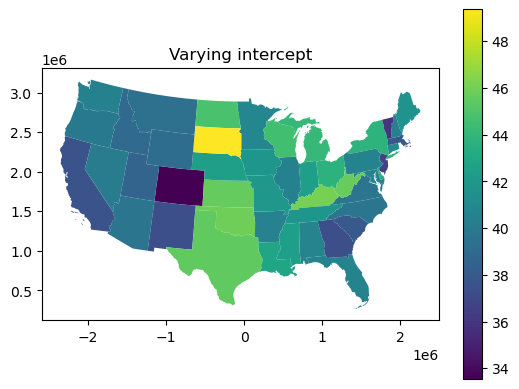

In [17]:
state.plot(model3.ranef.iloc[:,0].values + model3.coefs.Estimate[0],legend=True)
plt.title("Varying intercept")

Text(0.5, 1.0, 'Varying slope of pct_bach')

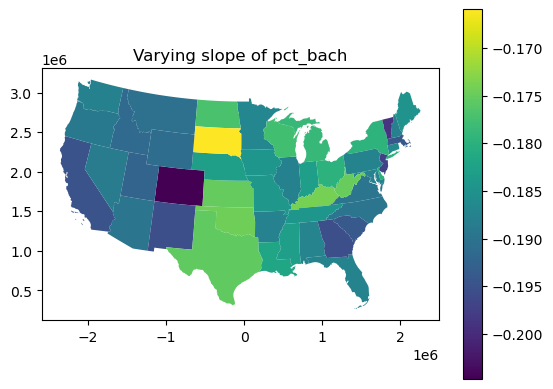

In [18]:
state.plot(model3.ranef.iloc[:,1].values + model3.coefs.Estimate.iloc[1],legend=True)
plt.title("Varying slope of pct_bach")

Text(0.5, 1.0, 'Varying slope of pct_black')

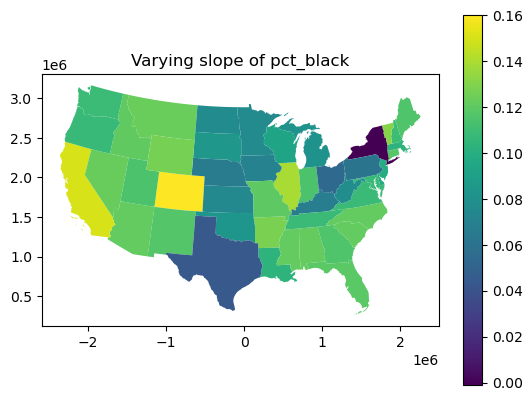

In [19]:
state.plot(model3.ranef.iloc[:,2].values + model3.coefs.Estimate.iloc[2],legend=True)
plt.title("Varying slope of pct_black")

Text(0.5, 1.0, 'Varying slope of median_income')

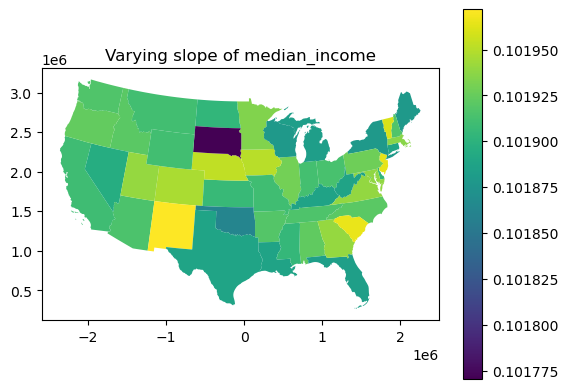

In [20]:
state.plot(model3.ranef.iloc[:,3].values + model3.coefs.Estimate.iloc[2],legend=True)
plt.title("Varying slope of median_income")


## Random Effects

- Intercept (State): Variance: 14.820 (This high variance suggests substantial differences in baseline obesity rates across states.)
Standard Deviation: 3.850 (States vary widely in their intercepts, indicating differing baseline obesity levels.)

- Predictors:
pct_bach: Near zero variance (0.000, Std. Dev: 0.009), indicating its effect on obesity is nearly consistent across states.
pct_black: Small variance (0.002, Std. Dev: 0.042), suggesting slight variability in its effect across states.
median_income: Near zero variance (0.000, Std. Dev: 0.000), showing its effect is almost constant across states.

- Correlations Among Random Effects
Strong positive correlation (1.000) between the intercept and pct_bach's effect suggests that states with higher intercepts tend to have a more pronounced decreasing effect of bachelor's degree attainment on obesity.
Negative correlations between the intercept and effects of pct_black (-0.482) and median_income (-0.820) indicate that states with higher obesity rates tend to have a lesser decreasing effect of these variables on obesity.

- Residual Effects
Residual:
Variance: 4.352
Standard Deviation: 2.086
Represents unexplained variability in obesity rates within states after accounting for the predictors.


## Fixed Effects
- Intercept (41.179): Average baseline obesity rate when all predictors are at their mean values.
- Percentage with a Bachelor's degree (pct_bach, -0.186): Each percentage increase in bachelor's degree holders is associated with a 0.186 percentage point decrease in the obesity rate, on average across states.
- Percentage of Black population (pct_black, 0.102): Each percentage point increase in the Black population is associated with a 0.102 percentage point increase in the obesity rate, on average.
- Median Income (median_income): Each unit increase in median income results in a tiny decrease in the obesity rate.



The high variance in the intercept and the significant correlations suggest substantial heterogeneity in how demographic and socio-economic factors impact obesity across different states. This can reflect variations in lifestyle, economic conditions, and health policies.
Implications for Policy:

In [21]:
def r_square(model):
    var_a = np.sum(model.ranef_var.Var.iloc[:-1]) #Sum of variances from random effects
    var_e = model.ranef_var.Var.iloc[-1] #Error variance 
    var_f = np.sum(model.design_matrix*model.coefs.Estimate,axis=1).var() #Sum of variances from fixed effects
    
    marginal = var_f/(var_f+var_a+var_e)
    
    conditional = (var_f+var_a)/(var_f+var_a+var_e)
    
    print("marginal R2:",marginal)
    print("conditional R2:",conditional)
    return

In [22]:
r_square(model_1)

marginal R2: 3.3856656969764287e-26
conditional R2: 0.5427596130002178


In [23]:
r_square(model_2)

marginal R2: 0.5134779540057215
conditional R2: 0.764965659628459


In [24]:
r_square(model3)

marginal R2: 0.3372768025751492
conditional R2: 0.8495837531562425


**Final comparison (10%):** compare AIC, conditional and marginal R2 in three models.


| Metric               | Model1      | Model2      | Model3     |
| ---------------------| ----------- | ----------- |------------|
| AIC                  | 16395.629   | 13766.138   |  13720.392 |
| conditional R2       | 0.543       | 0.765       |   0.850    |
| marginal R2          | 3.386       | 0.513       |   0.337    |

- Model3 seems to be the best model overall considering both AIC and Conditional R2, which indicates it has the best fit and explains the most variance including random effects. It is particularly strong where random effects are crucial.
- Model2 performs best in terms of explaining variance through fixed effects alone (Marginal R2), making it potentially preferable if the focus is on understanding the impact of fixed predictors independently of random effects.
- Model1 appears to be the weakest model in all respects based on these metrics, fitting the data the poorest both in terms of complexity and variance explained.